Import Libraries

In [2]:
    pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 74.3 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# M L
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, f1_score, precision_score, recall_score
import pickle
# Models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

Load Dataset

In [4]:


dataset = pd.read_csv(r"C:\Users\Daivansh\Downloads\archive(3)\Training.csv")
dataset.head()



,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [5]:


dataset.shape



(4920, 133)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [7]:


description = pd.read_csv(r"C:\Users\Daivansh\Downloads\archive(3)\description.csv")
description.head()



,Disease,Description
0,Fungal infection,Fungal infection is a common skin condition ca...
1,Allergy,Allergy is an immune system reaction to a subs...
2,GERD,GERD (Gastroesophageal Reflux Disease) is a di...
3,Chronic cholestasis,Chronic cholestasis is a condition where bile ...
4,Drug Reaction,Drug Reaction occurs when the body reacts adve...


In [8]:


description.shape



(41, 2)

In [9]:
description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Disease      41 non-null     object
 1   Description  41 non-null     object
dtypes: object(2)
memory usage: 788.0+ bytes


In [10]:
medications = pd.read_csv(r"C:\Users\Daivansh\Downloads\archive(3)\medications.csv")
medications.head()

,Disease,Medication
0,Fungal infection,"['Antifungal Cream', 'Fluconazole', 'Terbinafi..."
1,Allergy,"['Antihistamines', 'Decongestants', 'Epinephri..."
2,GERD,"['Proton Pump Inhibitors (PPIs)', 'H2 Blockers..."
3,Chronic cholestasis,"['Ursodeoxycholic acid', 'Cholestyramine', 'Me..."
4,Drug Reaction,"['Antihistamines', 'Epinephrine', 'Corticoster..."


In [11]:
medications.shape

(41, 2)

In [12]:
medications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     41 non-null     object
 1   Medication  41 non-null     object
dtypes: object(2)
memory usage: 788.0+ bytes


In [13]:
symtoms_df = pd.read_csv(r"C:\Users\Daivansh\Downloads\archive(3)\symtoms_df.csv")
symtoms_df.drop('Unnamed: 0',axis=1,inplace=True)
symtoms_df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN


In [14]:
symtoms_df.shape

(4920, 5)

In [15]:
symtoms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Disease    4920 non-null   object
 1   Symptom_1  4920 non-null   object
 2   Symptom_2  4920 non-null   object
 3   Symptom_3  4920 non-null   object
 4   Symptom_4  4572 non-null   object
dtypes: object(5)
memory usage: 192.3+ KB


In [16]:


symptom_severity = pd.read_csv(r"C:\Users\Daivansh\Downloads\archive(3)\Symptom-severity.csv")
symptom_severity.head()



,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [17]:


symptom_severity.shape



(133, 2)

In [18]:


symptom_severity.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Symptom  133 non-null    object
 1   weight   133 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [19]:


precautions_df = pd.read_csv(r"C:\Users\Daivansh\Downloads\archive(3)\precautions_df.csv")
precautions_df.drop('Unnamed: 0',axis=1,inplace=True)
precautions_df.head()



,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [20]:
precautions_df.shape

(41, 5)

In [21]:


precautions_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Disease       41 non-null     object
 1   Precaution_1  41 non-null     object
 2   Precaution_2  41 non-null     object
 3   Precaution_3  40 non-null     object
 4   Precaution_4  40 non-null     object
dtypes: object(5)
memory usage: 1.7+ KB


In [22]:


diets = pd.read_csv(r"C:\Users\Daivansh\Downloads\archive(3)\diets.csv")
diets.head()



,Disease,Diet
0,Fungal infection,"['Antifungal Diet', 'Probiotics', 'Garlic', 'C..."
1,Allergy,"['Elimination Diet', 'Omega-3-rich foods', 'Vi..."
2,GERD,"['Low-Acid Diet', 'Fiber-rich foods', 'Ginger'..."
3,Chronic cholestasis,"['Low-Fat Diet', 'High-Fiber Diet', 'Lean prot..."
4,Drug Reaction,"['Antihistamine Diet', 'Omega-3-rich foods', '..."


In [23]:


diets.shape



(41, 2)

In [24]:
diets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Disease  41 non-null     object
 1   Diet     41 non-null     object
dtypes: object(2)
memory usage: 788.0+ bytes


In [25]:


workout_df = pd.read_csv(r"C:\Users\Daivansh\Downloads\archive(3)\workout_df.csv",usecols=[2,3])
workout_df.head()



,disease,workout
0,Fungal infection,Avoid sugary foods
1,Fungal infection,Consume probiotics
2,Fungal infection,Increase intake of garlic
3,Fungal infection,Include yogurt in diet
4,Fungal infection,Limit processed foods


In [26]:
workout_df.shape

(410, 2)

In [27]:
workout_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   disease  410 non-null    object
 1   workout  410 non-null    object
dtypes: object(2)
memory usage: 6.5+ KB


In [28]:
names = dataset.prognosis.unique()
names

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [29]:


len(dataset.prognosis.unique())



41

In [30]:


value_counts = dataset.prognosis.value_counts()
value_counts 



prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

Preprocessing

In [31]:
label = LabelEncoder()
dataset.prognosis = label.fit_transform(dataset.prognosis)
dataset.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15


In [32]:
X = dataset.drop('prognosis',axis=1)
y = dataset['prognosis']
keys = X.columns
X.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
y.head()

0    15
1    15
2    15
3    15
4    15
Name: prognosis, dtype: int32

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=41, shuffle =True,stratify=y)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (3936, 132)
X_test shape is  (984, 132)
y_train shape is  (3936,)
y_test shape is  (984,)


ML Models

In [35]:
models = {
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'LGBM': LGBMClassifier(verbose=-1),
    'DecisionTree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(),
    'LogisticRegression': LogisticRegression()
}
### Validation Score
cv_results = {}
for model_name, model in models.items():
    print(f"Cross-validating {model_name}...")
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    cv_results[model_name] = cv_scores.mean()
    print(f"Mean accuracy for {model_name}: {cv_scores.mean():.4f}")

Cross-validating RandomForest...
Mean accuracy for RandomForest: 1.0000
Cross-validating XGBoost...
Mean accuracy for XGBoost: 1.0000
Cross-validating LGBM...
Mean accuracy for LGBM: 1.0000
Cross-validating DecisionTree...
Mean accuracy for DecisionTree: 0.9982
Cross-validating KNN...
Mean accuracy for KNN: 1.0000
Cross-validating SVC...
Mean accuracy for SVC: 1.0000
Cross-validating LogisticRegression...
Mean accuracy for LogisticRegression: 1.0000


In [36]:
cv_results_df = pd.DataFrame(list(cv_results.items()), columns=['Model', 'Mean Accuracy'])
cv_results_df = cv_results_df.sort_values(by='Mean Accuracy', ascending=False)
cv_results_df

,Model,Mean Accuracy
0,RandomForest,1.000000
1,XGBoost,1.000000
2,LGBM,1.000000
4,KNN,1.000000
5,SVC,1.000000
6,LogisticRegression,1.000000
3,DecisionTree,0.998221


In [37]:


best_model_name = cv_results_df.iloc[0]['Model']
print(f"\nBest model from CV: {best_model_name}")




Best model from CV: RandomForest


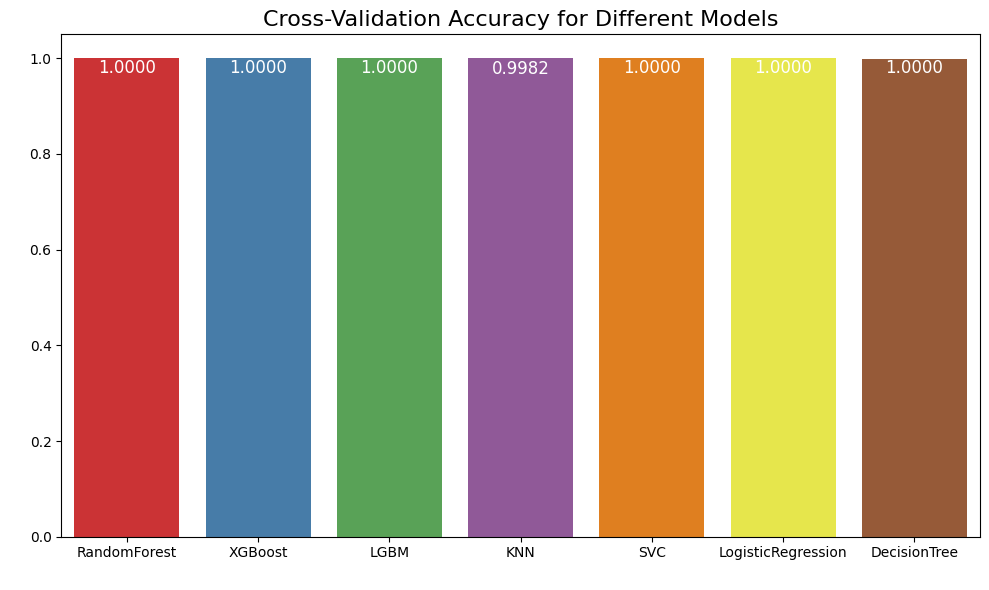

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(data=cv_results_df, x='Model', y='Mean Accuracy', palette="Set1")
plt.title('Cross-Validation Accuracy for Different Models', fontsize=16, color='black')
plt.xlabel('Model', color='white')
plt.ylabel('Mean Accuracy', color='white')
for index, row in cv_results_df.iterrows():
    plt.text(index, row['Mean Accuracy'] - 0.02, f'{row["Mean Accuracy"]:.4f}', 
             color='white', ha="center", va="center", fontsize=12)
plt.tight_layout()
plt.show()



In [40]:
param_grids = {
    'RandomForest': {'n_estimators': [10, 20, 30, 40], 'max_depth': [None, 10, 20, 30, 40], 'min_samples_split': [2, 5, 10]},
    'XGBoost': {'max_depth': [3, 5, 7], 'n_estimators': [50, 60, 70], 'subsample': [0.6, 0.8, 1], 'learning_rate': [0.01, 0.1, 0.2]},
    'LGBM': {'n_estimators': [50, 100, 150], 'max_depth': [-1, 5, 10], 'learning_rate': [0.01, 0.05, 0.1]},
    'DecisionTree': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]},
    'KNN': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'p': [1, 2]},
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']},
    'LogisticRegression': {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}
}
best_results = []
for model_name, model in models.items():
    print(f"\nPerforming GridSearchCV for {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    # Store the best score and parameters
    best_results.append({'Model': model_name, 'Best Score': best_score, 'Best Params': best_params})
    print(f"\nBest parameters for {model_name}: {best_params}")
    print(f"Best cross-validation score for {model_name}: {best_score:.4f}")


Performing GridSearchCV for RandomForest...
Fitting 5 folds for each of 60 candidates, totalling 300 fits

Best parameters for RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 10}
Best cross-validation score for RandomForest: 1.0000

Performing GridSearchCV for XGBoost...
Fitting 5 folds for each of 81 candidates, totalling 405 fits

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.6}
Best cross-validation score for XGBoost: 1.0000

Performing GridSearchCV for LGBM...
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best parameters for LGBM: {'learning_rate': 0.01, 'max_depth': -1, 'n_estimators': 50}
Best cross-validation score for LGBM: 1.0000

Performing GridSearchCV for DecisionTree...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best parameters for DecisionTree: {'max_depth': None, 'min_samples_split': 2}
Best cross-validation score for DecisionTree: 0.9982

Performing Gr

In [41]:
best_results_df = pd.DataFrame(best_results)
best_results_df = best_results_df.sort_values(by='Best Score', ascending=False)
best_results_df

,Model,Best Score,Best Params
0,RandomForest,1.000000,"{'max_depth': None, 'min_samples_split': 2, 'n..."
1,XGBoost,1.000000,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."
2,LGBM,1.000000,"{'learning_rate': 0.01, 'max_depth': -1, 'n_es..."
4,KNN,1.000000,"{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}"
5,SVC,1.000000,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}"
6,LogisticRegression,1.000000,"{'C': 0.01, 'penalty': 'l2', 'solver': 'liblin..."
3,DecisionTree,0.998221,"{'max_depth': None, 'min_samples_split': 2}"


In [42]:
best_model_name, best_model_param = best_results_df.iloc[0]['Model'],best_results_df.iloc[0]['Best Params']
print(f"\nBest model : {best_model_name}")
print(f"\nBest Parameters : {best_model_param}")


Best model : RandomForest

Best Parameters : {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 10}


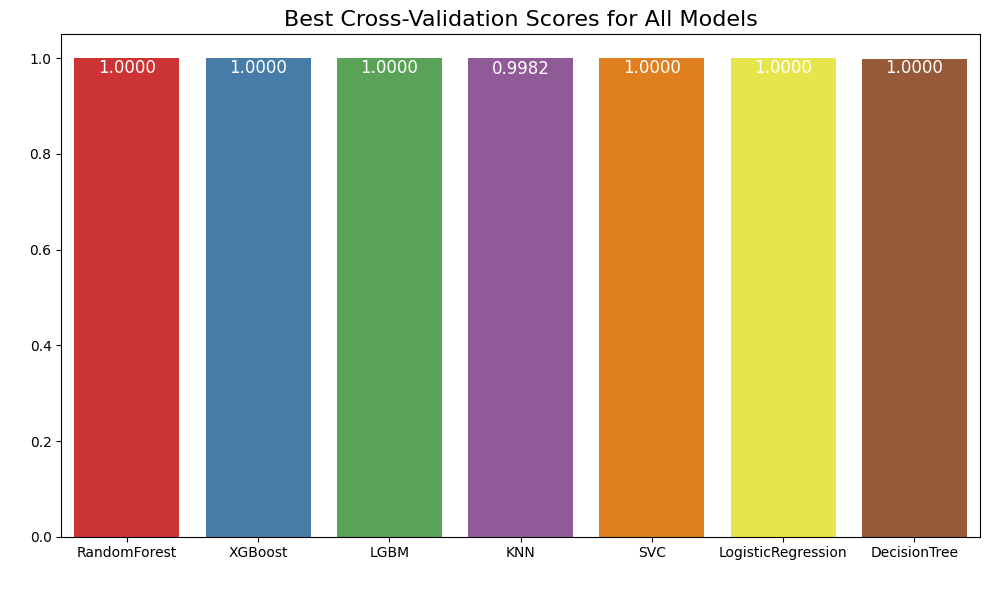

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(data=best_results_df, x='Model', y='Best Score', palette="Set1")
plt.title('Best Cross-Validation Scores for All Models', fontsize=16, color='black')
plt.xlabel('Model', color='white')
plt.ylabel('Best Score', color='white')
for index, row in best_results_df.iterrows():
    plt.text(index, row['Best Score'] - 0.02, f'{row["Best Score"]:.4f}', 
             color='white', ha="center", va="center", fontsize=12)
plt.tight_layout()
plt.show()

In [44]:
model = RandomForestClassifier(max_depth = None, min_samples_split = 2, n_estimators = 10)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [45]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred,average='micro')  
train_recall = recall_score(y_train, y_train_pred,average='micro')  
train_f1 = f1_score(y_train, y_train_pred,average='micro')  
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred,average='micro') 
test_recall = recall_score(y_test, y_test_pred,average='micro')  
test_f1 = f1_score(y_test, y_test_pred,average='micro') 
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Training Precision: {train_precision:.2f}')
print(f'Training Recall: {train_recall:.2f}')
print(f'Training F1-Score: {train_f1:.2f}')
print('---')
print(f'Test Accuracy: {test_accuracy:.2f}')
print(f'Test Precision: {test_precision:.2f}')
print(f'Test Recall: {test_recall:.2f}')
print(f'Test F1-Score: {test_f1:.2f}')

Training Accuracy: 1.00
Training Precision: 1.00
Training Recall: 1.00
Training F1-Score: 1.00
---
Test Accuracy: 1.00
Test Precision: 1.00
Test Recall: 1.00
Test F1-Score: 1.00


In [47]:
ClassificationReport = classification_report(y_test,y_test_pred,target_names=names)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                                           precision    recall  f1-score   support

                       Fungal infection       1.00      1.00      1.00        24
                                Allergy       1.00      1.00      1.00        24
                                   GERD       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      1.00      1.00        24
                          Drug Reaction       1.00      1.00      1.00        24
                    Peptic ulcer diseae       1.00      1.00      1.00        24
                                   AIDS       1.00      1.00      1.00        24
                              Diabetes        1.00      1.00      1.00        24
                        Gastroenteritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        24
                          Hypertension        1.00      1.00      1.00        24

In [48]:
pickle.dump(model,open('random.pkl','wb'))

In [49]:
symptoms_dict = {}
diseases_list = {}
for name in names:
    diseases_list[label.transform([name])[0]] = name
with open('diseases_list.pkl', 'wb') as f:
    pickle.dump(diseases_list, f)
for i,name in enumerate(keys):
    symptoms_dict[name] = i
with open('symptoms_dict.pkl', 'wb') as f:
    pickle.dump(symptoms_dict, f)
print('-------symptoms_dict-------\n\n',symptoms_dict)
print('\n\n-------diseases_list-------\n\n',diseases_list)

-------symptoms_dict-------

 {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 4

In [55]:
def helper(dis):
    # Description
    desc = description[description['Disease'] == dis]['Description']
    desc = " ".join([w for w in desc])

    # Precautions
    pre = precautions_df[precautions_df['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = [col for col in pre.values]

    # Medications
    med = medications[medications['Disease'] == dis]['Medication']
    med = [m for m in med.values]

    # Diets
    die = diets[diets['Disease'] == dis]['Diet']
    die = [d for d in die.values]

    # Workout
    wrkout = workout_df[workout_df['disease'] == dis]['workout']
    wrkout = [w for w in wrkout.values]   # ✅ convert to list

    return desc, pre, med, die, wrkout


# Model Prediction function
def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        if item in symptoms_dict:    # ✅ avoid KeyError
            input_vector[symptoms_dict[item]] = 1
    return diseases_list[model.predict([input_vector])[0]]


In [56]:
symptoms = 'inflammatory_nails, blister, red_sore_around_nose, yellow_crust_ooze'
user_symptoms = [s.strip() for s in symptoms.split(',')]

predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("-------predicted disease-------")
print(predicted_disease)
print("-------description-------")
print(desc)
print("-------precautions-------")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("-------medications-------")
i = 1
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("-------workout-------")
i = 1
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("-------diets-------")
i = 1
for d_i in die:
    print(i, ": ", d_i)
    i += 1

-------predicted disease-------
Impetigo
-------description-------
Impetigo is a highly contagious skin infection causing red sores that can break open.
-------precautions-------
1 :  soak affected area in warm water
2 :  use antibiotics
3 :  remove scabs with wet compressed cloth
4 :  consult doctor
-------medications-------
1 :  ['Topical antibiotics', 'Oral antibiotics', 'Antiseptics', 'Ointments', 'Warm compresses']
-------workout-------
1 :  Maintain good hygiene
2 :  Stay hydrated
3 :  Consume nutrient-rich foods
4 :  Limit sugary foods and beverages
5 :  Include foods rich in vitamin C
6 :  Consult a healthcare professional
7 :  Follow medical recommendations
8 :  Avoid scratching
9 :  Take prescribed antibiotics
10 :  Practice wound care
-------diets-------
1 :  ['Impetigo Diet', 'Antibiotic treatment', 'Fruits and vegetables', 'Hydration', 'Protein-rich foods']


In [53]:
symptoms = 'redness_of_eyes, sinus_pressure, runny_nose, congestion'
user_symptoms = [s.strip() for s in symptoms.split(',')]

predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("--------predicted disease--------")
print(predicted_disease)
print("--------description--------")
print(desc)
print("--------precautions--------")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("--------medications--------")
i = 1
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("--------workout--------")
i = 1
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("--------diets--------")
i = 1
for d_i in die:
    print(i, ": ", d_i)
    i += 1

--------predicted disease--------
Common Cold
--------description--------
Common Cold is a viral infection of the upper respiratory tract.
--------precautions--------
1 :  drink vitamin c rich drinks
2 :  take vapour
3 :  avoid cold food
4 :  keep fever in check
--------medications--------
1 :  ['Antibiotics', 'Antiviral drugs', 'Antifungal drugs', 'IV fluids', 'Oxygen therapy']
--------workout--------
1 :  Stay hydrated
2 :  Include nutrient-rich foods
3 :  Consume foods rich in vitamin C and antioxidants
4 :  Include zinc-rich foods
5 :  Limit sugary foods and beverages
6 :  Consume chicken soup
7 :  Consult a healthcare professional
8 :  Rest and conserve energy
9 :  Gradually resume normal diet
10 :  Follow medical recommendations
--------diets--------
1 :  ['Cold Diet', 'Hydration', 'Warm fluids', 'Rest', 'Honey and lemon tea']


In [57]:
symptoms = 'runny_nose, congestion, toxic_look_(typhos)'
user_symptoms = [s.strip() for s in symptoms.split(',')]

predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("--------predicted disease--------")
print(predicted_disease)
print("--------description--------")
print(desc)
print("--------precautions---------")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("--------medications--------")
i = 1
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("--------workout--------")
i = 1
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("--------diets--------")
i = 1
for d_i in die:
    print(i, ": ", d_i)
    i += 1

--------predicted disease--------
Common Cold
--------description--------
Common Cold is a viral infection of the upper respiratory tract.
--------precautions---------
1 :  drink vitamin c rich drinks
2 :  take vapour
3 :  avoid cold food
4 :  keep fever in check
--------medications--------
1 :  ['Antibiotics', 'Antiviral drugs', 'Antifungal drugs', 'IV fluids', 'Oxygen therapy']
--------workout--------
1 :  Stay hydrated
2 :  Include nutrient-rich foods
3 :  Consume foods rich in vitamin C and antioxidants
4 :  Include zinc-rich foods
5 :  Limit sugary foods and beverages
6 :  Consume chicken soup
7 :  Consult a healthcare professional
8 :  Rest and conserve energy
9 :  Gradually resume normal diet
10 :  Follow medical recommendations
--------diets--------
1 :  ['Cold Diet', 'Hydration', 'Warm fluids', 'Rest', 'Honey and lemon tea']
